# Looking at EMNIST data

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.data.emnist import EMNIST

In [5]:
dataset = EMNIST()
dataset.prepare_data()
dataset.setup()
print(dataset)

EMNIST Dataset
Num classes: 80
Mapping: ['<PAD>', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '?']
Dims: (1, 28, 28)
Train/val/test sizes: 266855, 66714, 55212
Batch x stats: (torch.Size([128, 1, 28, 28]), torch.float32, tensor(0.), tensor(0.1763), tensor(0.3345), tensor(1.))
Batch y stats: (torch.Size([128]), torch.int64, tensor(1), tensor(62))



In [3]:
x, y = next(iter(dataset.train_dataloader()))
print(x.shape, x.dtype, x.min(), x.mean(), x.std(), x.max())
print(y.shape, y.dtype, y.min(), y.max())

torch.Size([128, 1, 28, 28]) torch.float32 tensor(0.) tensor(0.1763) tensor(0.3345) tensor(1.)
torch.Size([128]) torch.int64 tensor(1) tensor(62)


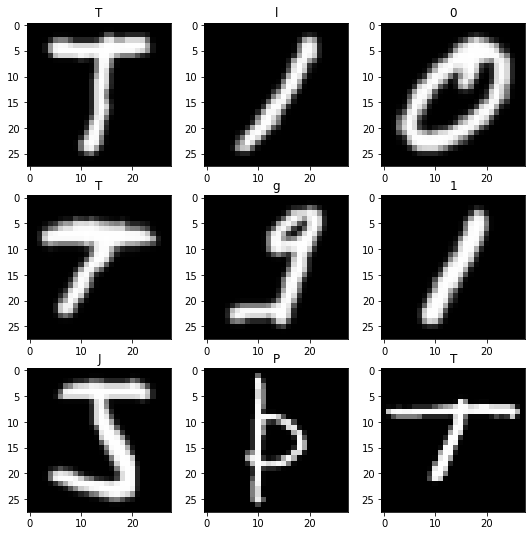

In [6]:
fig = plt.figure(figsize=(9, 9))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    rand_i = np.random.randint(len(dataset.data_train))
    image, label = dataset.data_train[rand_i]
    ax.imshow(image.reshape(28, 28), cmap='gray')
    ax.set_title(dataset.mapping[label])